In [1]:
from apportionment import *
from scipy.stats import kstest, norm, expon, gamma, lognorm
import warnings

warnings.filterwarnings("ignore")


In [2]:
# db_file = 'lowest_samples_complete.db'

# years = [2012]

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()
        
# for year in years:
#     cur.execute(f'''CREATE TABLE IF NOT EXISTS tab{year} (
#                 iteration_number INTEGER,
#                 party_number INTEGER,
#                 samples INTEGER,
#                 diff INTEGER
#                 );''')

#     # Read and insert data from CSV
#     with open(f'./raw_data/1m-{year}.csv', 'r') as file:
#         reader = csv.reader(file)
#         next(reader)  # Skip header if exists
#         for i, row in enumerate(reader):
#             cur.execute(f'''INSERT INTO tab{year} (iteration_number, party_number, samples, diff)
#                             VALUES (?, ?, ?, ?);''', row)
        
# # Commit changes and close connection
# conn.commit()
# conn.close()


In [3]:
# years = [2012]

# for year in years:
#     with sqlite3.connect('lowest_samples_complete.db') as conn:
#         cur = conn.cursor()

#         cur.execute(f'''
#             SELECT iteration_number, party_number, MIN(samples) 
#             FROM tab{year} 
#             WHERE diff > 0 
#             GROUP BY iteration_number, party_number;
#         ''')

#         results = cur.fetchall()

#         with open(f'lowest_samples{year}all.csv', 'w', newline='') as csvfile:
#             csvwriter = csv.writer(csvfile)
#             csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#             csvwriter.writerows(results)

#         exclude_list = ", ".join(map(str, constants.le_exclude[year]))

#         cur.execute(f'''
#             SELECT iteration_number, party_number, MIN(samples) 
#             FROM tab{year} 
#             WHERE diff > 0 AND party_number IN ({exclude_list}) 
#             GROUP BY iteration_number, party_number;
#         ''')
#         results = cur.fetchall()


#         with open(f'lowest_samples{year}non_el.csv', 'w', newline='') as csvfile:
#             csvwriter = csv.writer(csvfile)
#             csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#             csvwriter.writerows(results)

#         cur.execute(f'''
#             SELECT iteration_number, party_number, MIN(samples) 
#             FROM tab{year} 
#             WHERE diff > 0 AND party_number not IN ({exclude_list}) 
#             GROUP BY iteration_number, party_number;
#         ''')
#         results = cur.fetchall()


#         with open(f'lowest_samples{year}electable.csv', 'w', newline='') as csvfile:
#             csvwriter = csv.writer(csvfile)
#             csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#             csvwriter.writerows(results)

#     print(f'year {year} done')


In [4]:

# for year in [2023, 2020, 2016, 2012, 2010, 2006, 2002, 1998, 1994]:
#     for subj in range(constants.subjects[year]):
#         with sqlite3.connect('coalitions.db') as conn:
#             cur = conn.cursor()

#             cur.execute(f'''
#                 SELECT iteration_number, party_number, MIN(samples) 
#                 FROM tab{year}
#                 WHERE diff < 76 AND party_number = {subj}
#                 GROUP BY iteration_number, party_number;
#             ''')

#             results = cur.fetchall()

#             with open(f'./db_exports_specific/coalitions{year}all-{subj}.csv', 'w', newline='') as csvfile:
#                 csvwriter = csv.writer(csvfile)
#                 csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#                 csvwriter.writerows(results)

data for subj 16 23305.659102
data for subj 12 6865.8170310000005


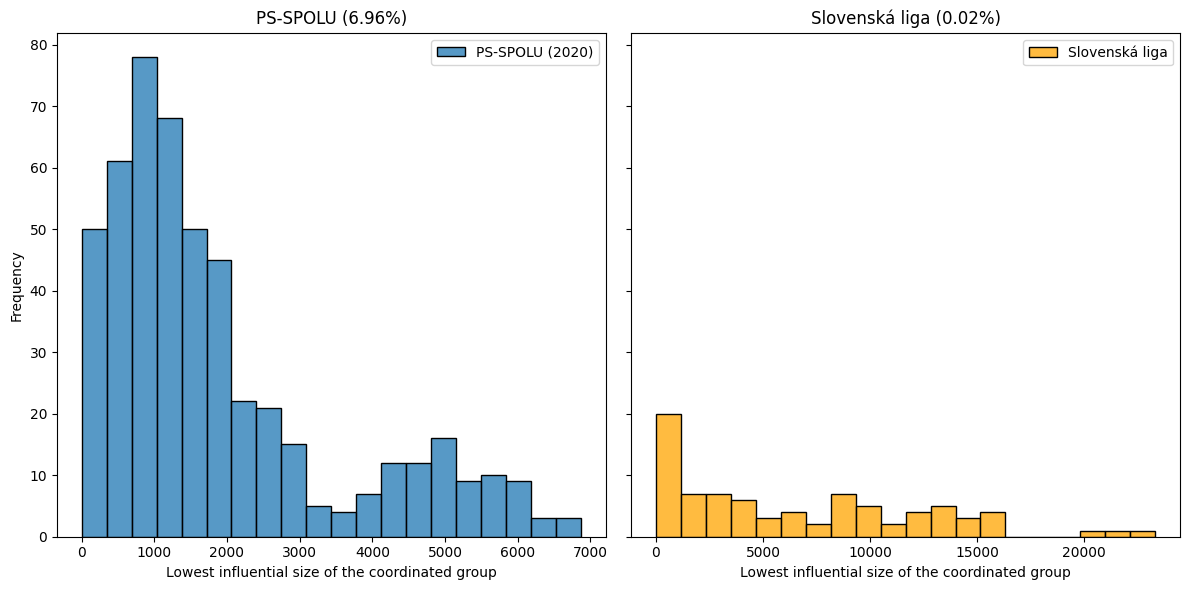

Subject 16 - Slovenská liga. Mean: 6630, Std Dev: 5674
Subject 12 - PS-SPOLU. Mean: 1885, Std Dev: 1602


In [5]:
dfx = pd.read_csv(f'./db_exports_specific/lowest_samples2020all-12.csv', header=0)
df = pd.read_csv(f'./db_exports_specific/lowest_samples2020all-16.csv', header=0)

total_voters_2020 = constants.all_voters[2020]

display_data_df = df["lowest_samples"] * (total_voters_2020 / 1000000)
display_data_dfx = dfx["lowest_samples"] * (total_voters_2020 / 1000000)

print("data for subj 16", max(display_data_df))
print("data for subj 12", max(display_data_dfx))

cumulative_mean_df = np.mean(display_data_df)
cumulative_std_dev_df = np.std(display_data_df)

cumulative_mean_dfx = np.mean(display_data_dfx)
cumulative_std_dev_dfx = np.std(display_data_dfx)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(display_data_dfx, ax=axes[0], bins=20, label='PS-SPOLU (2020)')
axes[0].set_xlabel('Lowest influential size of the coordinated group')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].set_title(f'PS-SPOLU (6.96%)')

sns.histplot(display_data_df, ax=axes[1], bins=20, label='Slovenská liga', color='orange')
axes[1].set_xlabel('Lowest influential size of the coordinated group')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_title(f'Slovenská liga (0.02%)')

plt.tight_layout()
plt.show()

print(f"Subject 16 - Slovenská liga. Mean: {cumulative_mean_df:.0f}, Std Dev: {cumulative_std_dev_df:.0f}")
print(f"Subject 12 - PS-SPOLU. Mean: {cumulative_mean_dfx:.0f}, Std Dev: {cumulative_std_dev_dfx:.0f}")


data for subj 16 23809.6306
data for subj 3 22185.74796
data for subj 12 19131.093048
data for subj 25 10607.903624


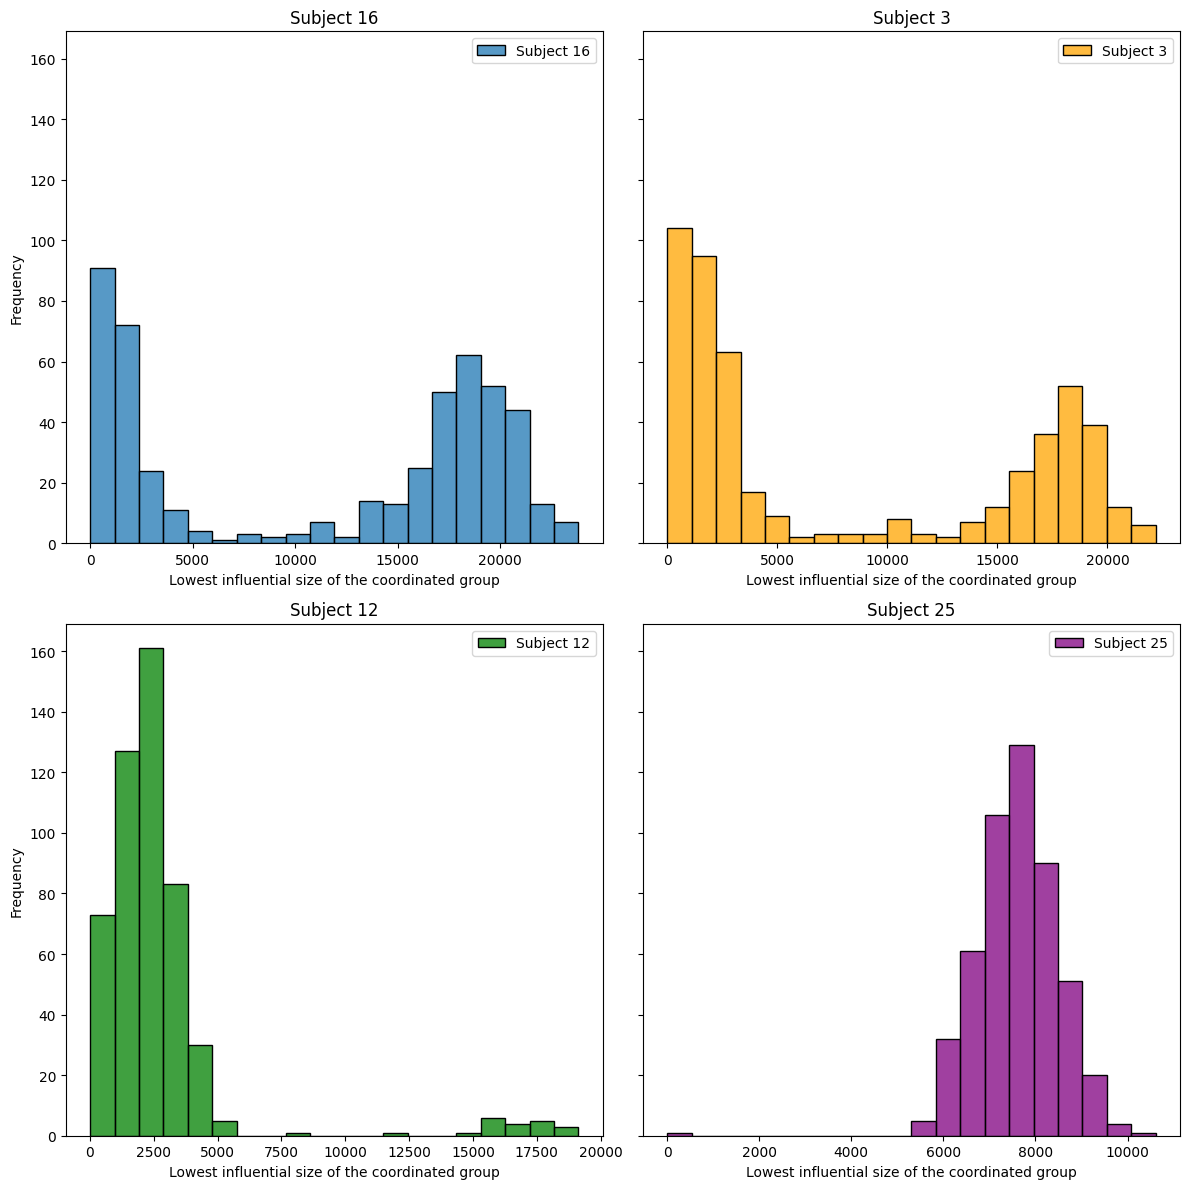

Subject 16. Mean: 11366, Std Dev: 8421
Subject 3. Mean: 8182, Std Dev: 7863
Subject 12. Mean: 2753, Std Dev: 3068
Subject 25. Mean: 7597, Std Dev: 894
Subject 25 norm KS Test: Statistic=0.033, p-value=0.639
Subject 25 expon KS Test: Statistic=0.526, p-value=0.000
Subject 25 gamma KS Test: Statistic=0.084, p-value=0.002
Subject 25 lognorm KS Test: Statistic=0.033, p-value=0.639
Subject 16 norm KS Test: Statistic=0.204, p-value=0.000
Subject 16 expon KS Test: Statistic=0.253, p-value=0.000
Subject 16 gamma KS Test: Statistic=0.207, p-value=0.000
Subject 16 lognorm KS Test: Statistic=0.266, p-value=0.000
Subject 12 norm KS Test: Statistic=0.254, p-value=0.000
Subject 12 expon KS Test: Statistic=0.164, p-value=0.000
Subject 12 gamma KS Test: Statistic=0.998, p-value=0.000
Subject 12 lognorm KS Test: Statistic=0.095, p-value=0.000
Subject 3 norm KS Test: Statistic=0.256, p-value=0.000
Subject 3 expon KS Test: Statistic=0.196, p-value=0.000
Subject 3 gamma KS Test: Statistic=0.186, p-value=0

In [6]:
total_voters_2023 = constants.all_voters[2023]

df16 = pd.read_csv('./db_exports_specific/lowest_samples2023all-16.csv', header=0)
df3 = pd.read_csv('./db_exports_specific/lowest_samples2023all-3.csv', header=0)
df12 = pd.read_csv('./db_exports_specific/lowest_samples2023all-12.csv', header=0)
df25 = pd.read_csv('./db_exports_specific/lowest_samples2023all-25.csv', header=0)

display_data_df16 = df16["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df3 = df3["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df12 = df12["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df25 = df25["lowest_samples"] * (total_voters_2023 / 1000000)

print("data for subj 16", max(display_data_df16))
print("data for subj 3", max(display_data_df3))
print("data for subj 12", max(display_data_df12))
print("data for subj 25", max(display_data_df25))

# Calculate mean and standard deviation
cumulative_mean_df16 = np.mean(display_data_df16)
cumulative_std_dev_df16 = np.std(display_data_df16)

cumulative_mean_df3 = np.mean(display_data_df3)
cumulative_std_dev_df3 = np.std(display_data_df3)

cumulative_mean_df12 = np.mean(display_data_df12)
cumulative_std_dev_df12 = np.std(display_data_df12)

cumulative_mean_df25 = np.mean(display_data_df25)
cumulative_std_dev_df25 = np.std(display_data_df25)

# Perform Kolmogorov-Smirnov test for various distributions
def test_distribution(data, dist_name):
    if dist_name == 'norm':
        params = norm.fit(data)
        return kstest(data, 'norm', args=params)
    elif dist_name == 'expon':
        params = expon.fit(data)
        return kstest(data, 'expon', args=params)
    elif dist_name == 'gamma':
        params = gamma.fit(data)
        return kstest(data, 'gamma', args=params)
    elif dist_name == 'lognorm':
        params = lognorm.fit(data)
        return kstest(data, 'lognorm', args=params)
    else:
        return None

distributions = ['norm', 'expon', 'gamma', 'lognorm']
ks_test_results_25 = {dist: test_distribution(display_data_df25, dist) for dist in distributions}
ks_test_results_16 = {dist: test_distribution(display_data_df16, dist) for dist in distributions}
ks_test_results_12 = {dist: test_distribution(display_data_df12, dist) for dist in distributions}
ks_test_results_3 = {dist: test_distribution(display_data_df3, dist) for dist in distributions}


# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

sns.histplot(display_data_df16, ax=axes[0, 0], bins=20, label='Subject 16')
axes[0, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_title(f'Subject 16')

sns.histplot(display_data_df3, ax=axes[0, 1], bins=20, label='Subject 3', color='orange')
axes[0, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_title(f'Subject 3')

sns.histplot(display_data_df12, ax=axes[1, 0], bins=20, label='Subject 12', color='green')
axes[1, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].set_title(f'Subject 12')

sns.histplot(display_data_df25, ax=axes[1, 1], bins=20, label='Subject 25', color='purple')
axes[1, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].set_title(f'Subject 25')

plt.tight_layout()
plt.show()

# Print mean, standard deviation, and KS test results
print(f"Subject 16. Mean: {cumulative_mean_df16:.0f}, Std Dev: {cumulative_std_dev_df16:.0f}")
print(f"Subject 3. Mean: {cumulative_mean_df3:.0f}, Std Dev: {cumulative_std_dev_df3:.0f}")
print(f"Subject 12. Mean: {cumulative_mean_df12:.0f}, Std Dev: {cumulative_std_dev_df12:.0f}")
print(f"Subject 25. Mean: {cumulative_mean_df25:.0f}, Std Dev: {cumulative_std_dev_df25:.0f}")

for dist, result in ks_test_results_25.items():
    print(f"Subject 25 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_16.items():
    print(f"Subject 16 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_12.items():
    print(f"Subject 12 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_3.items():
    print(f"Subject 3 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

In [7]:
def load_and_scale_data(subject_number):
    file_path = f'./db_exports_specific/lowest_samples2023all-{subject_number}.csv'
    try:
        df = pd.read_csv(file_path, header=0)
        display_data = df["lowest_samples"] * (constants.all_voters[2023] / 1000000)
        return display_data
    except FileNotFoundError:
        print(f"File not found for subject {subject_number}")
        return None

# Function to perform KS test for various distributions
def test_distribution(data, dist_name):
    if dist_name == 'norm':
        params = norm.fit(data)
        return kstest(data, 'norm', args=params)
    elif dist_name == 'expon':
        params = expon.fit(data)
        return kstest(data, 'expon', args=params)
    elif dist_name == 'gamma':
        params = gamma.fit(data)
        return kstest(data, 'gamma', args=params)
    elif dist_name == 'lognorm':
        params = lognorm.fit(data)
        return kstest(data, 'lognorm', args=params)
    else:
        return None

# Test distributions for subjects 0 to 25
distributions = ['norm', 'expon', 'gamma', 'lognorm']

for subject_number in range(26):
    data = load_and_scale_data(subject_number)
    if data is not None:
        print(f"\nSubject {subject_number} Distribution Tests:")
        for dist in distributions:
            try:
                result = test_distribution(data, dist)
                if result.pvalue > 0.05: print(f"{dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")
            except:
                pass


Subject 0 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 1 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 2 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 3 Distribution Tests:

Subject 4 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 5 Distribution Tests:

Subject 6 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 7 Distribution Tests:
lognorm KS Test: Statistic=0.502, p-value=0.995

Subject 8 Distribution Tests:
lognorm KS Test: Statistic=0.505, p-value=0.991

Subject 9 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 10 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 11 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 12 Distribution Tests:

Subject 13 Distribution Tests:

Subject 14 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

S

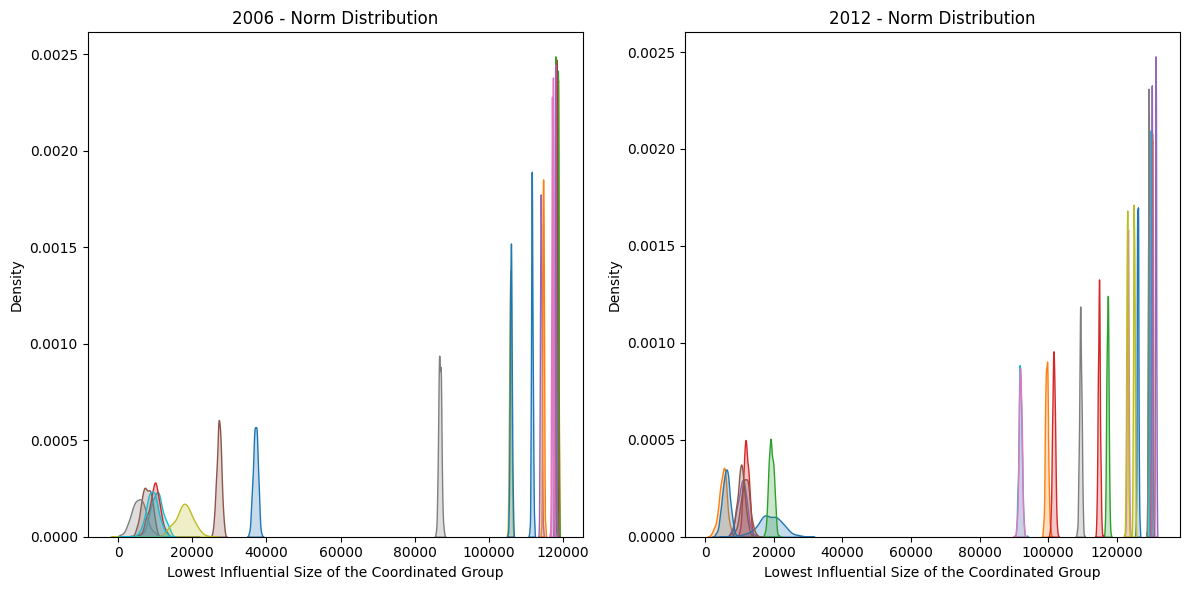

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm



def load_and_scale_data(subject_number, year):
    file_path = f'./db_exports_specific/lowest_samples{year}all-{subject_number}.csv'
    try:
        df = pd.read_csv(file_path, header=0)
        display_data = df["lowest_samples"] * (constants.all_voters[year] / 1000000)
        return display_data
    except FileNotFoundError:
        print(f"File not found for subject {subject_number} in year {year}")
        return None

def test_distribution(data, dist_name):
    try:
        if dist_name == 'norm':
            params = norm.fit(data)
            return kstest(data, 'norm', args=params)
        else:
            return None
    except Exception as e:
        # print(f"FitError for {dist_name} distribution: {e}")
        return None

p_value_threshold = 0.05
distribution = 'norm'
years = [2006, 2012]
good_fit_subjects = {year: [] for year in years}

for year in years:
    for subject_number in range(constants.subjects[year]):
        data = load_and_scale_data(subject_number, year)
        if data is not None:
            result = test_distribution(data, distribution)
            if result is not None:
                if result.pvalue > p_value_threshold and len(data) > 100:
                    good_fit_subjects[year].append((subject_number, result.pvalue, len(data)))

fig, axes = plt.subplots(1, len(years), figsize=(12, 6))

for j, year in enumerate(years):
    if good_fit_subjects[year]:
        for subject_number, pvalue, data_size in good_fit_subjects[year]:
            data = load_and_scale_data(subject_number, year)
            if data_size > 100:
                sns.kdeplot(data, shade=True, label=f'Subject {subject_number} (p={pvalue:.3f}, n={data_size})', ax=axes[j])
        axes[j].set_title(f'{year} - {distribution.capitalize()} Distribution')
        axes[j].set_xlabel('Lowest Influential Size of the Coordinated Group')
        if j == 0:
            axes[j].set_ylabel('Density')
        # axes[j].legend()

plt.tight_layout()
plt.show()


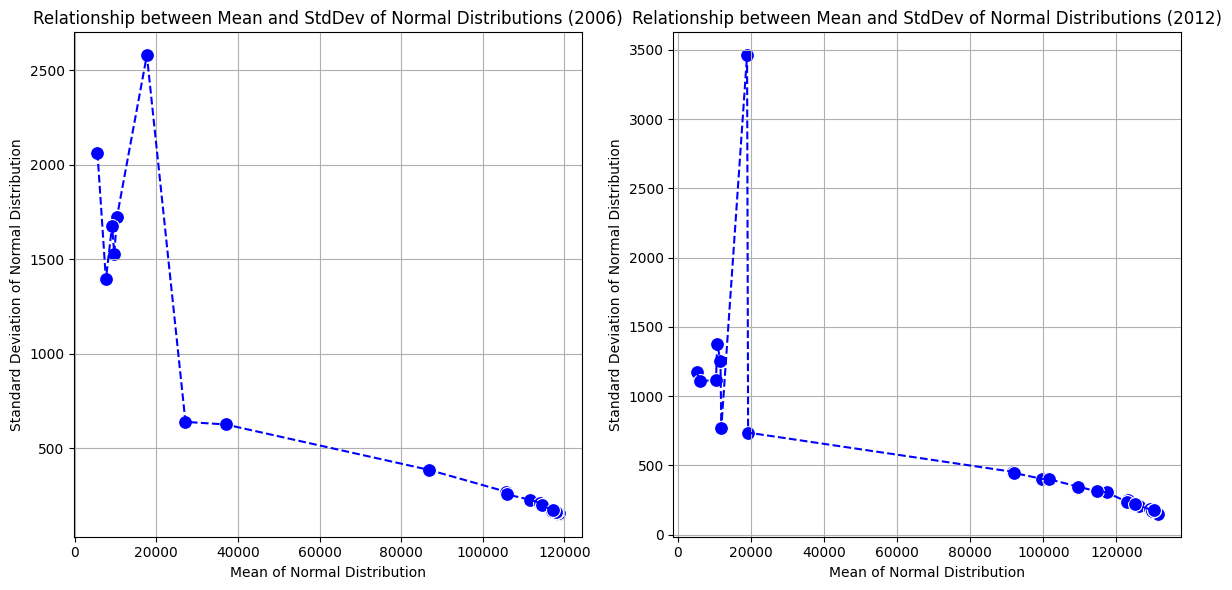


Data for year 2006:
             Mean       StdDev
17    5608.601426  2062.599890
5     7676.286028  1392.561820
19    9183.954737  1678.037741
13    9725.590262  1528.536242
9    10399.596909  1725.116340
18   17707.814143  2578.758179
15   27161.997035   639.188401
10   37002.278744   625.446361
7    86739.836901   385.616865
8   105745.393902   269.473050
20  105893.804053   255.271811
0   111578.148660   227.440876
4   113986.985200   210.805490
11  114622.829725   200.364212
6   116997.545944   167.839265
16  117232.927450   173.151766
14  117905.609617   162.679419
12  117926.562040   161.637350
3   118176.666640   164.277312
2   118572.481160   155.162007
1   118608.293398   152.863797

Data for year 2012:
             Mean       StdDev
1     5099.864018  1177.157670
20    6031.529230  1108.357224
5    10436.164889  1116.809732
4    10733.033083  1379.034246
15   11645.714121  1253.608061
3    11877.863941   773.188594
10   18926.755103  3461.404158
22   19214.126817   736.5264

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest
import os

def load_and_scale_data(subject_number, year):
    file_path = f'./db_exports_specific/lowest_samples{year}all-{subject_number}.csv'
    try:
        df = pd.read_csv(file_path, header=0)
        display_data = df["lowest_samples"] * (constants.all_voters[year] / 1000000)
        return display_data
    except FileNotFoundError:
        print(f"File not found for subject {subject_number}")
        return None

# Function to perform KS test for normal distribution
def test_distribution(data, dist_name='norm'):
    try:
        if dist_name == 'norm':
            params = norm.fit(data)
            return kstest(data, 'norm', args=params)
        else:
            return None
    except Exception as e:
        return None

# Define p-value threshold for good fitting
p_value_threshold = 0.05

# Function to analyze data for a given year
def analyze_year(year):
    distributions = ['norm']
    good_fit_subjects = {dist: [] for dist in distributions}  # Store subjects with good fit for each distribution

    for subject_number in range(constants.subjects[year]):
        data = load_and_scale_data(subject_number, year)
        if data is not None:
            for dist in distributions:
                result = test_distribution(data, dist)
                if result is not None and result.pvalue > p_value_threshold and len(data) > 100:  # Check if the p-value indicates a good fit
                    good_fit_subjects[dist].append((subject_number, result.pvalue, len(data)))

    # Extract mean and standard deviation for subjects with good fit
    means_stds = []

    for dist, subjects in good_fit_subjects.items():
        if subjects:
            for subject_number, pvalue, data_size in subjects:
                data = load_and_scale_data(subject_number, year)
                if data is not None and data_size > 100:
                    mean = np.mean(data)
                    std_dev = np.std(data)
                    means_stds.append((mean, std_dev))
                    
    return pd.DataFrame(means_stds, columns=['Mean', 'StdDev'])

# Analyze data for the years 2006, 2012
years = [2006, 2012]
results = {year: analyze_year(year) for year in years}

# Plot the relationship between mean and standard deviation for each year side by side
plt.figure(figsize=(18, 6))

for i, year in enumerate(years, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Mean', y='StdDev', data=results[year], s=100, color='blue')
    sns.lineplot(x='Mean', y='StdDev', data=results[year], color='blue', linestyle='--')
    plt.title(f'Relationship between Mean and StdDev of Normal Distributions ({year})')
    plt.xlabel('Mean of Normal Distribution')
    plt.ylabel('Standard Deviation of Normal Distribution')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display the DataFrames
for year in years:
    print(f"\nData for year {year}:")
    print(results[year].sort_values(by="Mean"))

In [10]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data_all = np.array([])
cumulative_data_non_el = np.array([])
cumulative_data = np.array([])

for i, year in enumerate(years):
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data_all = np.append(cumulative_data_all, df["lowest_samples"].values)

    df = pd.read_csv(f'./db_exports/lowest_samples{year}electable.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data = np.append(cumulative_data, df["lowest_samples"].values)

    df = pd.read_csv(f'./db_exports/lowest_samples{year}non_el.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data_non_el = np.append(cumulative_data_non_el, df["lowest_samples"].values)


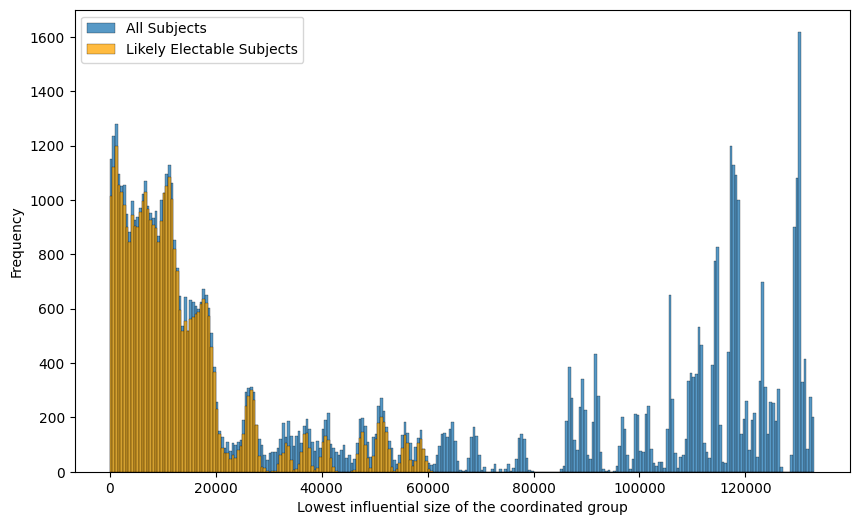

 Likely electable. Mean: 13396, Std Dev: 12908
 All. Mean: 51250, Std Dev: 48696
 Not likely electable. Mean: 96565, Std Dev: 35238


In [11]:
data_min = min(cumulative_data_all.min(), cumulative_data.min())
data_max = max(cumulative_data_all.max(), cumulative_data.max())

# Define consistent bin edges
bin_width = 500  # Adjust bin width as needed
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot histogram for array1
sns.histplot(cumulative_data_all, bins=bin_edges, label='All Subjects')

# Plot histogram for array2 with a different color
sns.histplot(cumulative_data, bins=bin_edges, color='orange', label='Likely Electable Subjects')

plt.xlabel('Lowest influential size of the coordinated group')
plt.ylabel('Frequency')
plt.legend()
plt.show()

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Likely electable. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

cumulative_mean = np.mean(cumulative_data_all)
cumulative_std_dev = np.std(cumulative_data_all)

print(f" All. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

cumulative_mean = np.mean(cumulative_data_non_el)
cumulative_std_dev = np.std(cumulative_data_non_el)

print(f" Not likely electable. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")


In [12]:
# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]
# db_file = "lowest_samples_complete.db"

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()

# for year in years:
#     cur.execute(f'''
#     SELECT
#       total_rows,
#       selected_rows,
#       (selected_rows * 100.0 / total_rows) AS percentage
#     FROM (
#       SELECT
#         (SELECT COUNT(*) FROM tab{year}) AS total_rows,
#         (SELECT COUNT(*) FROM tab{year} WHERE diff > 0) AS selected_rows
#     )
#     ''')
#     results = cur.fetchall()
#     print(f'Year {year} : {results}')


# conn.commit()
# conn.close()

'''
Year 2023 : [(390000000, 139608347, 35.79701205128205)]
Year 2020 : [(375000000, 184957456, 49.321988266666665)]
Year 2016 : [(360000000, 147023553, 40.83987583333333)]
Year 2012 : [(405000000, 136175804, 33.62365530864197)]
Year 2010 : [(285000000, 215887319, 75.74993649122807)]
Year 2006 : [(330000000, 129116568, 39.12623272727273)]
Year 2002 : [(390000000, 130509343, 33.4639341025641)]
Year 1998 : [(270000000, 87096479, 32.25795518518518)]
Year 1994 : [(270000000, 120306765, 44.55806111111111)]
'''


'\nYear 2023 : [(390000000, 139608347, 35.79701205128205)]\nYear 2020 : [(375000000, 184957456, 49.321988266666665)]\nYear 2016 : [(360000000, 147023553, 40.83987583333333)]\nYear 2012 : [(405000000, 136175804, 33.62365530864197)]\nYear 2010 : [(285000000, 215887319, 75.74993649122807)]\nYear 2006 : [(330000000, 129116568, 39.12623272727273)]\nYear 2002 : [(390000000, 130509343, 33.4639341025641)]\nYear 1998 : [(270000000, 87096479, 32.25795518518518)]\nYear 1994 : [(270000000, 120306765, 44.55806111111111)]\n'

Year 2023 - Mean: 29603, Std Dev: 39794
Year 2020 - Mean: 22106, Std Dev: 25975
Year 2016 - Mean: 56380, Std Dev: 55672
Year 2012 - Mean: 83913, Std Dev: 50834
Year 2010 - Mean: 26231, Std Dev: 19204
Year 2006 - Mean: 75641, Std Dev: 48059
Year 2002 - Mean: 47173, Std Dev: 44848
Year 1998 - Mean: 20580, Std Dev: 24621
Year 1994 - Mean: 51101, Std Dev: 45507


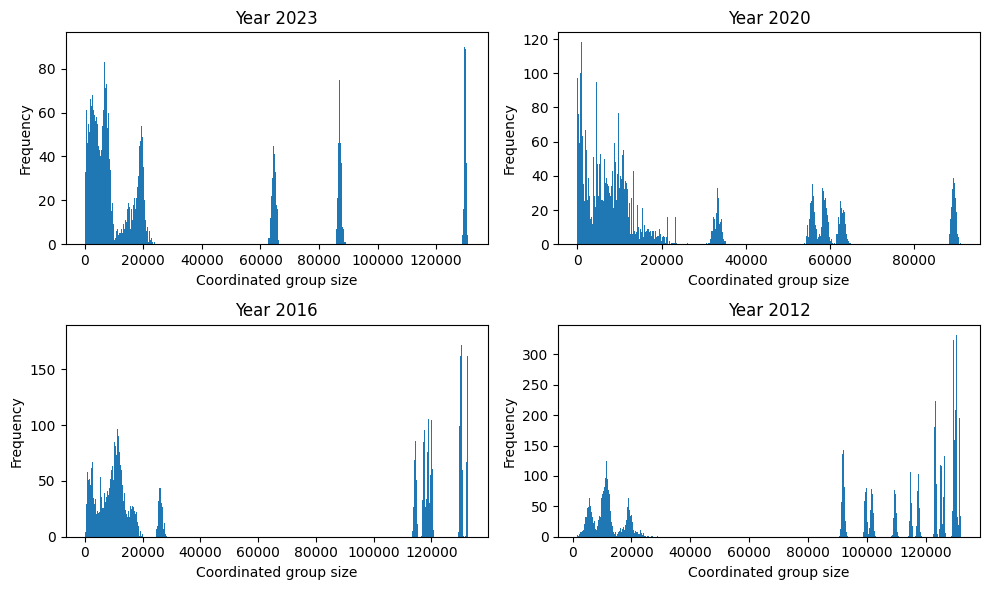

 Mean: 51250, Std Dev: 48696


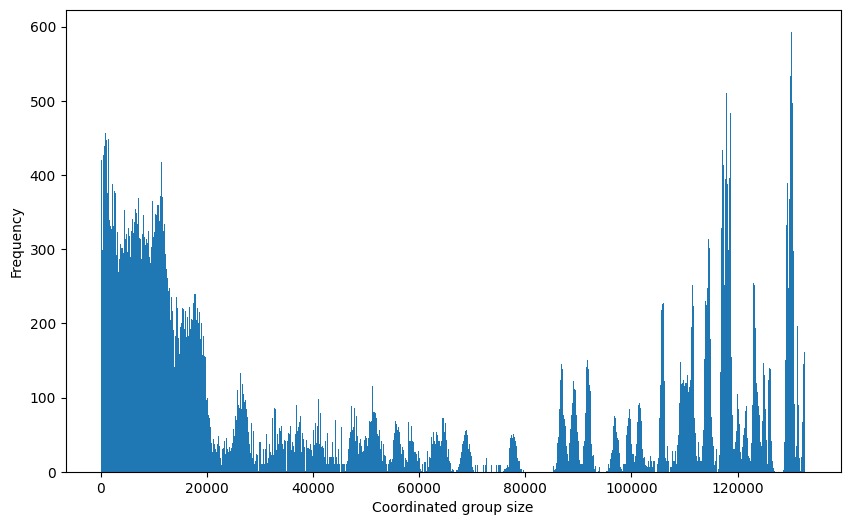

In [13]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data = []

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs = axs.ravel()

for i, year in enumerate(years):
    i
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)]/ 1000000)
    
    cumulative_data.extend(df.iloc[:, 2])

    mean_value = np.mean(df.iloc[:, 2])
    std_dev = np.std(df.iloc[:, 2])

    try:
        axs[i].hist(df.iloc[:, 2], bins=800)
        
        axs[i].set_xlabel('Coordinated group size')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Year {year}')

    except IndexError:
        pass

    print(f"Year {year} - Mean: {mean_value:.0f}, Std Dev: {std_dev:.0f}")


plt.tight_layout()  # Adjust subplot spacing for better visibility
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cumulative_data, bins=800)
plt.xlabel('Coordinated group size')
plt.ylabel('Frequency')

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

plt.show()


data for subj 16 6014
data for subj 12 7403


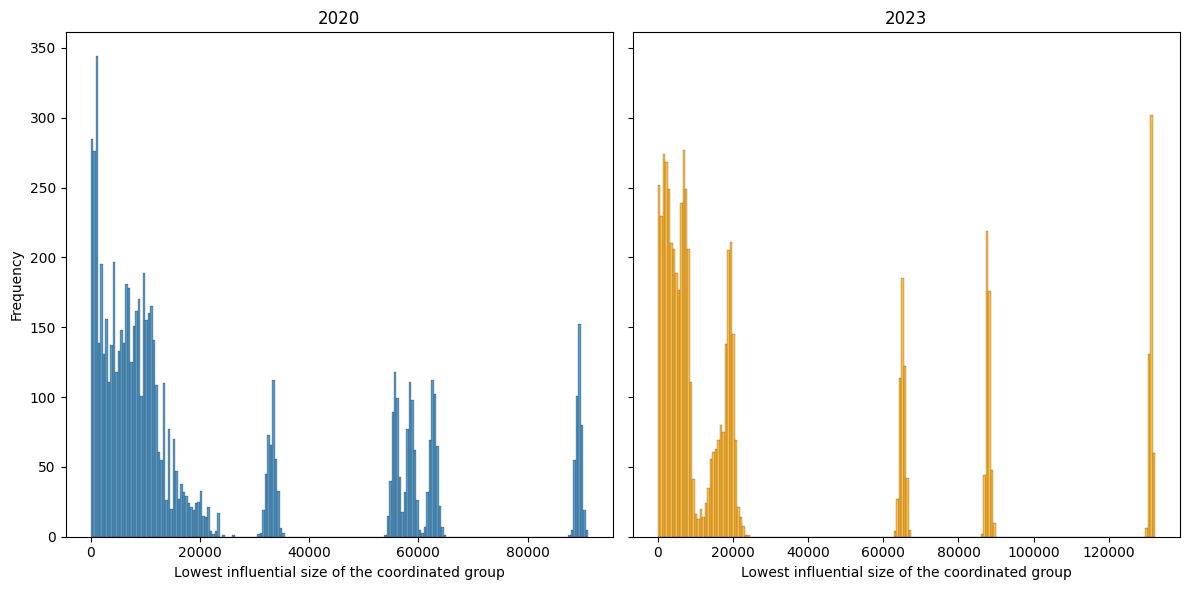

2020. Mean: 22106, Std Dev: 25975
2023. Mean: 29897, Std Dev: 40189


In [14]:
dfx = pd.read_csv(f'./db_exports/lowest_samples2020all.csv', header=0)
df = pd.read_csv(f'./db_exports/lowest_samples2023all.csv', header=0)

total_voters_2020 = constants.all_voters[2020]

display_data_df = df["lowest_samples"] * (total_voters_2020 / 1000000)
display_data_dfx = dfx["lowest_samples"] * (total_voters_2020 / 1000000)

print("data for subj 16", len(display_data_df))
print("data for subj 12", len(display_data_dfx))

cumulative_mean_df = np.mean(display_data_df)
cumulative_std_dev_df = np.std(display_data_df)

cumulative_mean_dfx = np.mean(display_data_dfx)
cumulative_std_dev_dfx = np.std(display_data_dfx)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bins = 200

sns.histplot(display_data_dfx, ax=axes[0], bins=bins, label='2020')
axes[0].set_xlabel('Lowest influential size of the coordinated group')
axes[0].set_ylabel('Frequency')
# axes[0].legend()
axes[0].set_title(f'2020')

sns.histplot(display_data_df, ax=axes[1], bins=bins, label='2023', color='orange')
axes[1].set_xlabel('Lowest influential size of the coordinated group')
axes[1].set_ylabel('Frequency')
# axes[1].legend()
axes[1].set_title(f'2023')

plt.tight_layout()
plt.show()

print(f"2020. Mean: {cumulative_mean_dfx:.0f}, Std Dev: {cumulative_std_dev_dfx:.0f}")
print(f"2023. Mean: {cumulative_mean_df:.0f}, Std Dev: {cumulative_std_dev_df:.0f}")


Data for subject 12
12, 2020. Mean: 1885, Std Dev: 1602
15, 2020. Mean: 9853, Std Dev: 2591
Data for subject 15
18, 2023. Mean: 19172, Std Dev: 1164
25, 2023. Mean: 7597, Std Dev: 894


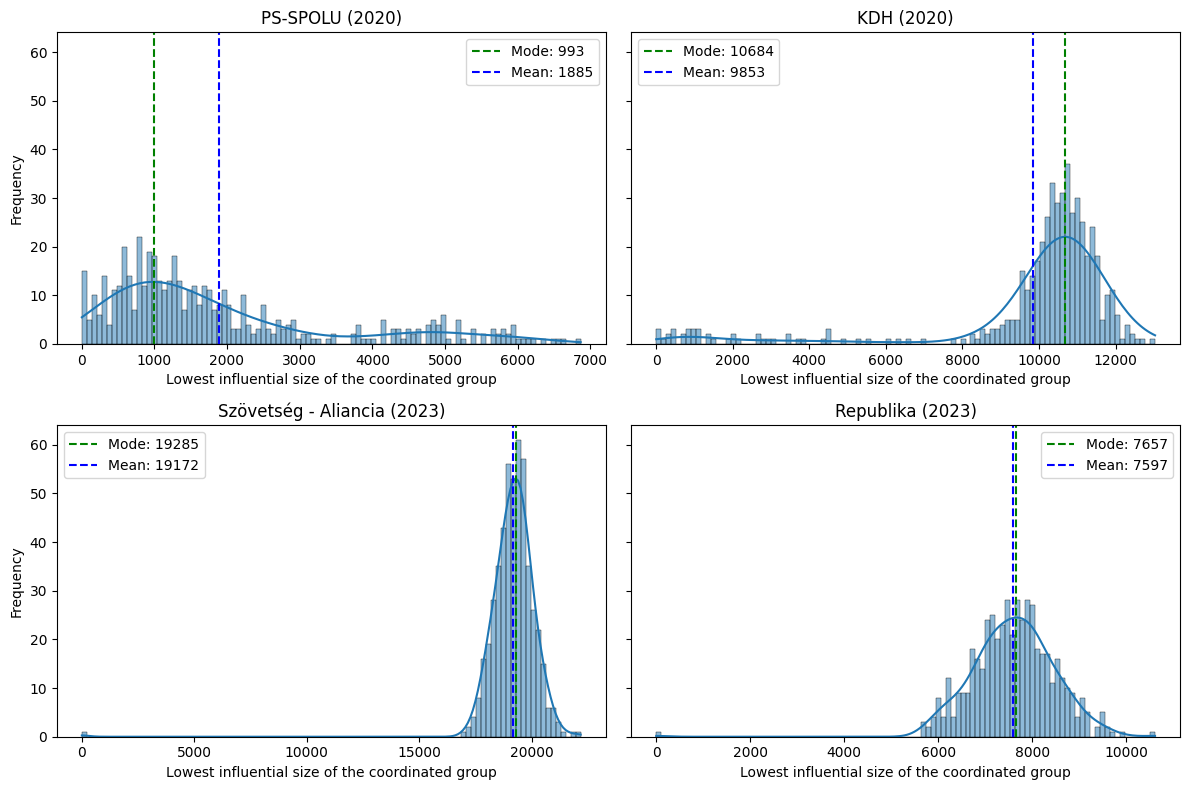

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import constants  # Import the constants module

# Load the data
df1 = pd.read_csv('./db_exports_specific/lowest_samples2020all-12.csv', header=0)
df2 = pd.read_csv('./db_exports_specific/lowest_samples2020all-15.csv', header=0)
df3 = pd.read_csv('./db_exports_specific/lowest_samples2023all-18.csv', header=0)
df4 = pd.read_csv('./db_exports_specific/lowest_samples2023all-25.csv', header=0)

# Process the data for display
display_data_df1 = df1["lowest_samples"] * (constants.all_voters[2020] / 1000000)
display_data_df2 = df2["lowest_samples"] * (constants.all_voters[2020] / 1000000)
display_data_df3 = df3["lowest_samples"] * (constants.all_voters[2023] / 1000000)
display_data_df4 = df4["lowest_samples"] * (constants.all_voters[2023] / 1000000)

# Calculate statistics
cumulative_mean_df1 = np.mean(display_data_df1)
cumulative_std_dev_df1 = np.std(display_data_df1)

cumulative_mean_df2 = np.mean(display_data_df2)
cumulative_std_dev_df2 = np.std(display_data_df2)

cumulative_mean_df3 = np.mean(display_data_df3)
cumulative_std_dev_df3 = np.std(display_data_df3)

cumulative_mean_df4 = np.mean(display_data_df4)
cumulative_std_dev_df4 = np.std(display_data_df4)

# Print statistics
print("Data for subject 12")
print(f"12, 2020. Mean: {cumulative_mean_df1:.0f}, Std Dev: {cumulative_std_dev_df1:.0f}")
print(f"15, 2020. Mean: {cumulative_mean_df2:.0f}, Std Dev: {cumulative_std_dev_df2:.0f}")

print("Data for subject 15")
print(f"18, 2023. Mean: {cumulative_mean_df3:.0f}, Std Dev: {cumulative_std_dev_df3:.0f}")
print(f"25, 2023. Mean: {cumulative_mean_df4:.0f}, Std Dev: {cumulative_std_dev_df4:.0f}")

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

bins = 100

def plot_kde(ax, data):
    kde = gaussian_kde(data, bw_method='silverman')
    x_range = np.linspace(min(data), max(data), 1000)
    kde_values = kde(x_range)
    mode_index = np.argmax(kde_values)
    mode_value = x_range[mode_index]
    mean_value = np.mean(data)
    ax.axvline(mode_value, color='g', linestyle='--', label=f'Mode: {mode_value:.0f}')
    ax.axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.0f}')
    return mode_value, mean_value

# Subject 12 (2020)
sns.histplot(display_data_df1, ax=axes[0, 0], bins=bins, kde=True)
mode_12_2020, mean_12_2020 = plot_kde(axes[0, 0], display_data_df1)
axes[0, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('PS-SPOLU (2020)')
axes[0, 0].legend()

# Subject 15 (2020)
sns.histplot(display_data_df2, ax=axes[0, 1], bins=bins, kde=True)
mode_15_2020, mean_15_2020 = plot_kde(axes[0, 1], display_data_df2)
axes[0, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('KDH (2020)')
axes[0, 1].legend()

# Subject 18 (2023)
sns.histplot(display_data_df3, ax=axes[1, 0], bins=bins, kde=True)
mode_18_2023, mean_18_2023 = plot_kde(axes[1, 0], display_data_df3)
axes[1, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Szövetség - Aliancia (2023)')
axes[1, 0].legend()

# Subject 25 (2023)
sns.histplot(display_data_df4, ax=axes[1, 1], bins=bins, kde=True)
mode_25_2023, mean_25_2023 = plot_kde(axes[1, 1], display_data_df4)
axes[1, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Republika (2023)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
